In [1]:
import sys

sys.path.append(r"C:\Users\xca30\GRI\NewZeaLiDAR")

import os

# Set an environment variable
os.environ["MY_VARIABLE"] = "my_value"

os.environ["POSTGRES_HOST"] = "localhost"
os.environ["POSTGRES_PORT"]="5433"
os.environ["POSTGRES_DB"]="db"
os.environ["POSTGRES_USER"]="postgres"
os.environ["POSTGRES_PASSWORD"]="postgres"

In [2]:
from newzealidar import tables
from newzealidar import utils
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:


engine = utils.get_database()


gdf = tables.read_postgis_table(engine, "dataset")

gdf.shape

(84, 15)

In [4]:
gdf.head()

,id,name,describe,survey_start_date,survey_end_date,publication_date,point_cloud_density,original_datum,meta_path,meta_source,extent_path,tile_path,geometry,created_at,updated_at
0,1,NZ23_Porirua,"Porirua, Wellington, New Zealand 2023",2023-01-18,2023-04-16,2023-08-28,27.20,NZVD2016,../datastorage/lidar/NZ23_Porirua/NZ23_Porirua...,https://portal.opentopography.org/datasetMetad...,../datastorage/lidar/NZ23_Porirua/NZ23_Porirua...,../datastorage/lidar/NZ23_Porirua/NZ23_Porirua...,"MULTIPOLYGON (((1765738.412 5443440.010, 17657...",2023-09-12 21:22:45,2023-10-15 23:18:19
1,21,NZ16_Queen,"Queenstown, Otago, New Zealand 2016",2016-03-01,2016-04-21,2019-01-08,5.84,NZVD2016,../datastorage/lidar/NZ16_Queen/NZ16_Queen_Met...,https://portal.opentopography.org/datasetMetad...,../datastorage/lidar/NZ16_Queen/NZ16_Queen_Ext...,../datastorage/lidar/NZ16_Queen/NZ16_Queen_Til...,"POLYGON ((1254410.000 5001599.000, 1254409.000...",2023-09-12 21:24:28,2023-10-15 23:19:00
2,63,NZ10_CAlpine,"Central Alpine Fault, NZ 2010",2010-07-07,2010-07-08,2022-10-25,4.37,Lyttleton 1937,../datastorage/lidar/NZ10_CAlpine/NZ10_CAlpine...,https://portal.opentopography.org/datasetMetad...,../datastorage/lidar/NZ10_CAlpine/NZ10_CAlpine...,../datastorage/lidar/NZ10_CAlpine/NZ10_CAlpine...,"MULTIPOLYGON (((1369798.880 5192078.820, 13698...",2023-09-12 21:28:07,2023-10-15 23:23:42
3,79,LiDAR_2007_2008_Area_2,None,2008-07-10,2008-07-10,2008-07-10,NaN,Moturiki 1953,None,http://data.waikatoregion.govt.nz:8080/ords/f?...,../datastorage/lidar_waikato/LiDAR_Regional_Ex...,../datastorage/lidar_waikato/LiDAR_2007_2008/L...,"MULTIPOLYGON (((1756461.308 5793273.261, 17564...",2023-09-12 21:31:55,2023-09-12 21:31:55
4,11,Hurunui_2013,"Hurunui Rivers, Canterbury, New Zealand 2013",2013-05-12,2013-05-30,2017-05-10,1.52,NZVD2016,../datastorage/lidar/Hurunui_2013/Hurunui_2013...,https://portal.opentopography.org/datasetMetad...,../datastorage/lidar/Hurunui_2013/Hurunui_2013...,../datastorage/lidar/Hurunui_2013/Hurunui_2013...,"MULTIPOLYGON (((1620500.440 5252026.690, 16197...",2023-09-12 21:23:21,2023-10-15 23:18:22


In [5]:
df = pd.read_csv(r'C:\Users\xca30\ML\migars\docs\File report.txt', delimiter=r' ', header=None) 
df.columns = ["name", "size"]
df["size"] = df["size"].astype(float)

df

,name,size
0,NZ20_BoP,564.2000
1,NZ21_Waikato,563.9000
2,NZ21_Tasman,497.9000
3,NZ18_North,480.5000
4,NZ21_Taranaki,360.1000
...,...,...
79,LiDAR_2007_2008_Area_2,0.0983
80,LiDAR_2007_2008_Area_6,0.0503
81,LiDAR_2007_2008_Area_5,0.0449
82,LiDAR_2006_Lake_Taupo,0.1706


In [6]:
new_gdf = pd.merge(gdf, df, on='name', how='inner')
new_gdf = new_gdf.sort_values(by="size", ascending=False)
print(new_gdf.head())

    id           name                              describe survey_start_date  \
17  45       NZ20_BoP  Bay of Plenty, New Zealand 2019-2022        2019-10-27   
45  70   NZ21_Waikato             Waikato, New Zealand 2021        2021-01-05   
75  57    NZ21_Tasman         Tasman, New Zealand 2020-2022        2020-01-28   
12  65     NZ18_North      Northland, New Zealand 2018-2020        2018-12-01   
72  54  NZ21_Taranaki            Taranaki, New Zealand 2021        2021-04-03   

   survey_end_date publication_date  point_cloud_density original_datum  \
17      2022-10-24       2021-08-03                10.78       NZVD2016   
45      2021-03-26       2023-05-15                10.04       NZVD2016   
75      2022-01-30       2022-05-16                14.18       NZVD2016   
12      2020-02-01       2022-11-07                 8.80       NZVD2016   
72      2021-10-16       2022-04-20                 9.08       NZVD2016   

                                            meta_path  \
17   

In [7]:
distric_gdf = gpd.read_file(r"C:\Users\xca30\ML\migars\docs\1.gpkg", driver="GPKG")
distric_gdf.head()

,id,name,geometry
0,1001,North Auckland,"MULTIPOLYGON (((1649501.785 6169888.077, 16497..."
1,1002,South Auckland,"MULTIPOLYGON (((1837764.820 5962615.057, 18377..."
2,1003,Hawkes Bay,"MULTIPOLYGON (((1992477.504 5675492.685, 19925..."
3,1004,Gisborne,"MULTIPOLYGON (((1963177.627 5775296.689, 19631..."
4,1005,Taranaki,"MULTIPOLYGON (((1774732.060 5629052.266, 17747..."


C:\Users\xca30\AppData\Local\Temp\ipykernel_22012\118083334.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(new_gdf))


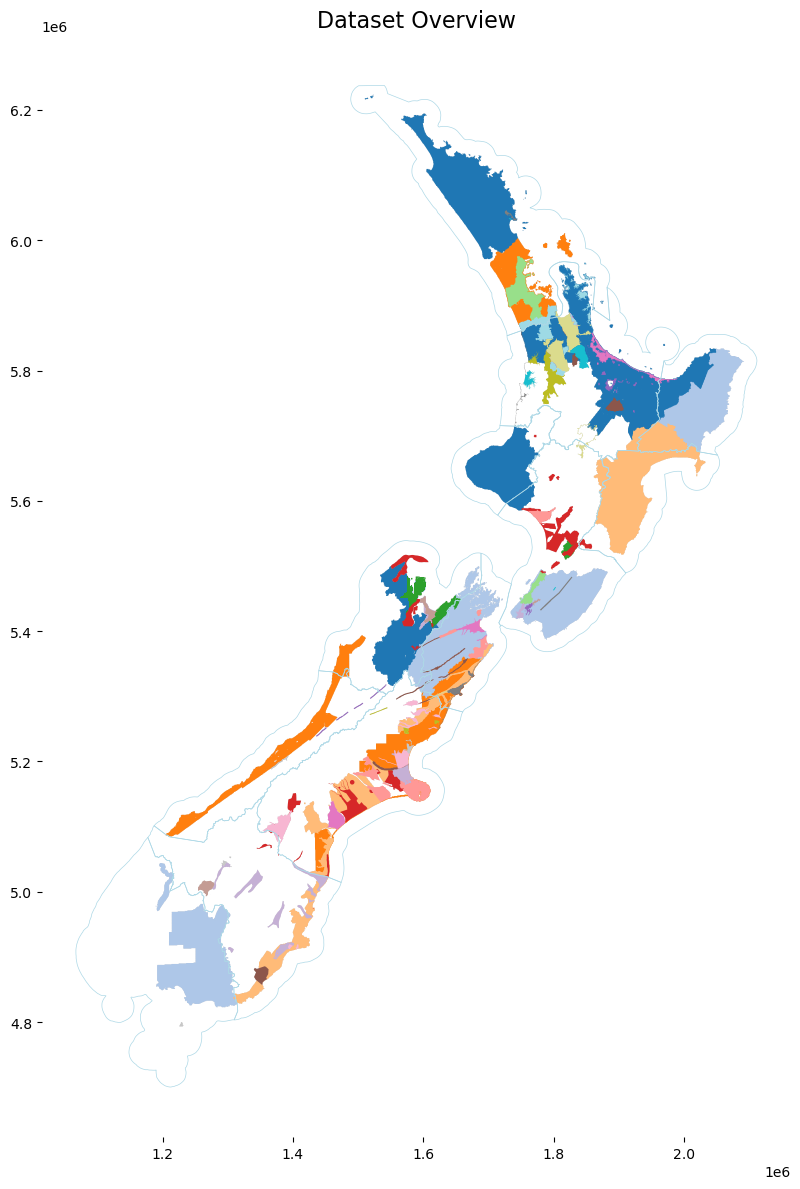

In [78]:
fig, ax = plt.subplots(figsize = (12,12))
new_gdf.plot(ax=ax, color='lightgrey')
cmap = plt.cm.get_cmap('tab20', len(new_gdf))
new_gdf.plot(ax=ax, cmap=cmap, linewidth=2, edgecolor='none') #legend=True)
# new_gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=1)
distric_gdf.boundary.plot(ax=ax, color="lightblue", edgecolor='none', linewidth=0.5)
ax.set_title('Dataset Overview', fontsize=16)
plt.box(False)
plt.tight_layout()
plt.savefig('overview.png', format='png', transparent=True)

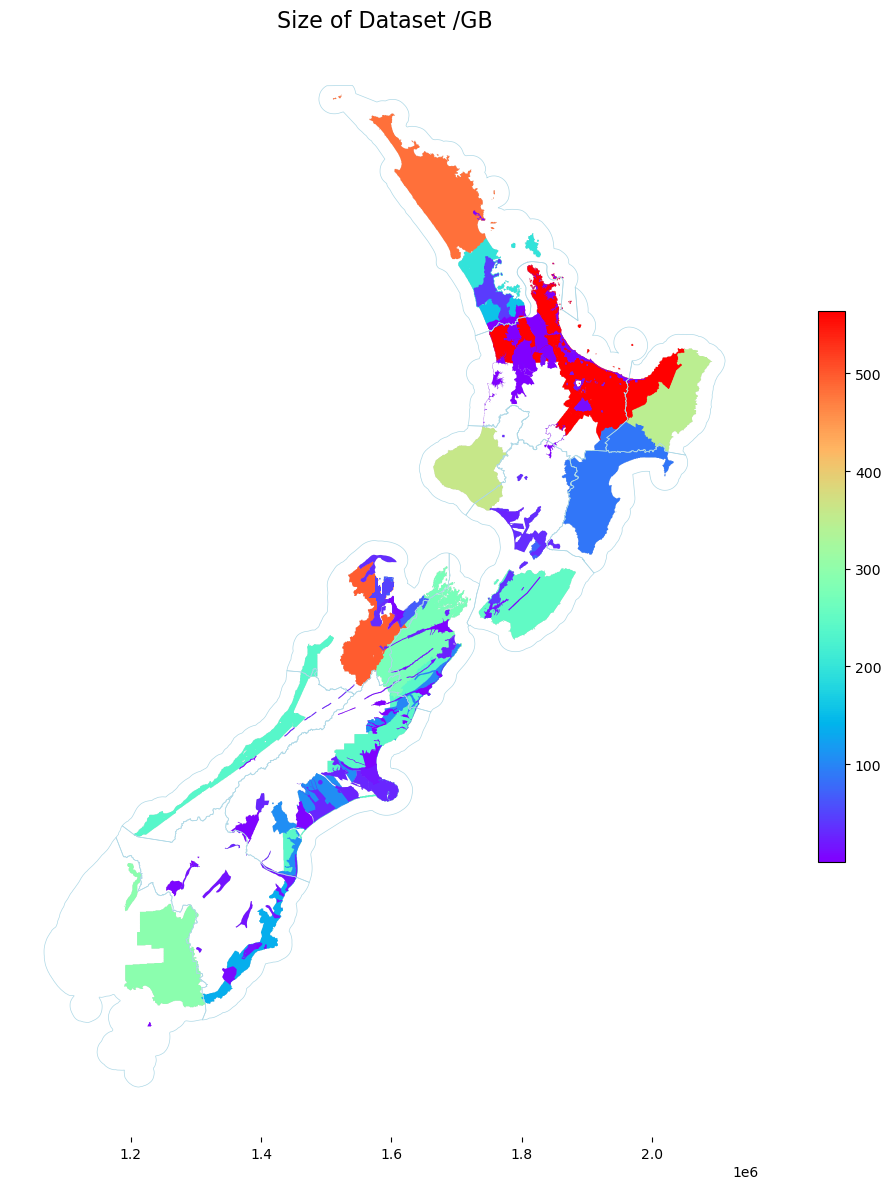

In [79]:
fig, ax = plt.subplots(figsize = (12,12))
new_gdf.plot(ax=ax, color='lightgrey')
legend_kwds = {"shrink":.5}
new_gdf.plot(ax=ax, column="size", cmap="rainbow", legend=True, legend_kwds=legend_kwds)
distric_gdf.boundary.plot(ax=ax, color="lightblue", edgecolor='gray', linewidth=0.5)
ax.set_title('Size of Dataset /GB', fontsize=16)
legend = ax.get_legend()
plt.yticks([])
plt.box(False)
plt.tight_layout()
plt.savefig('size.png', format='png', transparent=True)

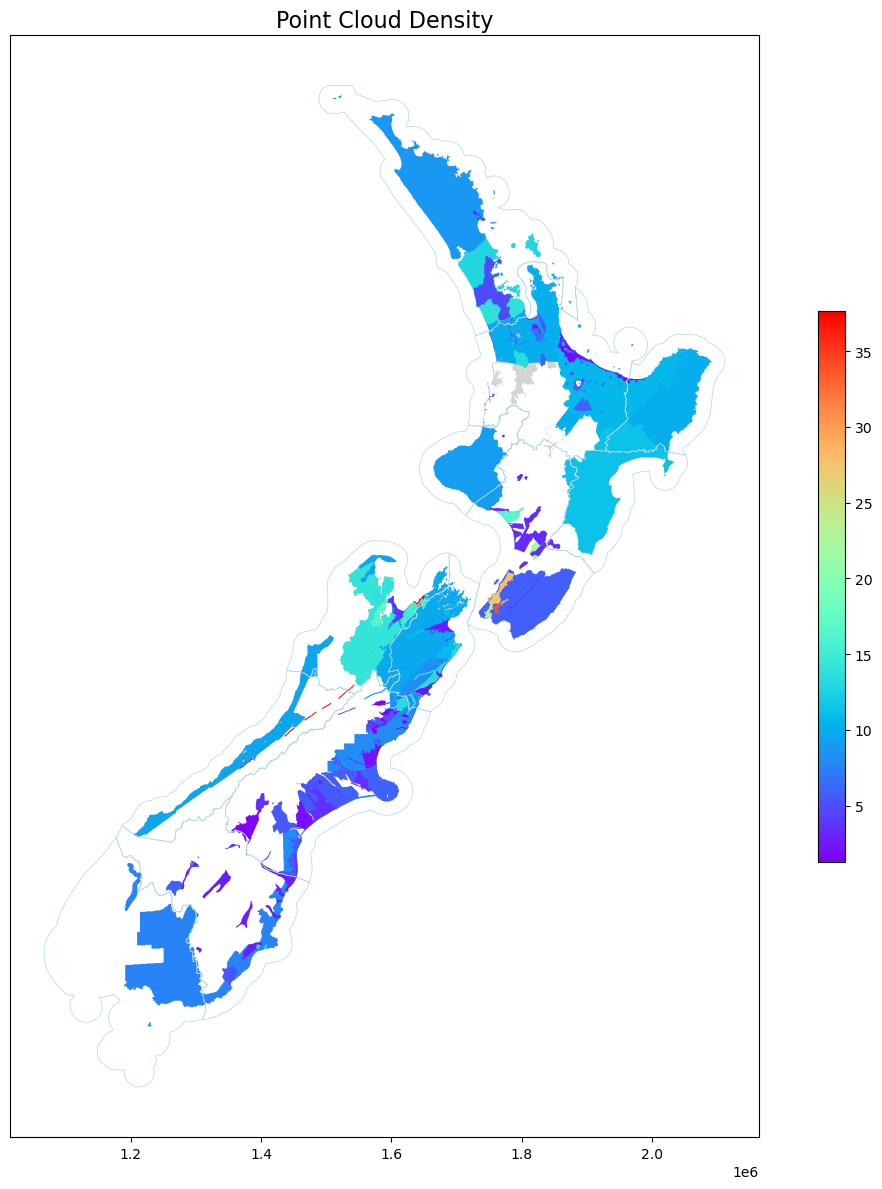

In [80]:



fig, ax = plt.subplots(figsize = (12,12))
new_gdf.plot(ax=ax, color='lightgrey')
legend_kwds = {"shrink":.5}
new_gdf.plot(ax=ax, column="point_cloud_density", cmap="rainbow", legend=True, legend_kwds=legend_kwds)
distric_gdf.boundary.plot(ax=ax, color="lightblue", edgecolor='gray', linewidth=0.5)
ax.set_title('Point Cloud Density', fontsize=16)
plt.yticks([])
plt.tight_layout()
plt.savefig('density.png', format='png', transparent=True)

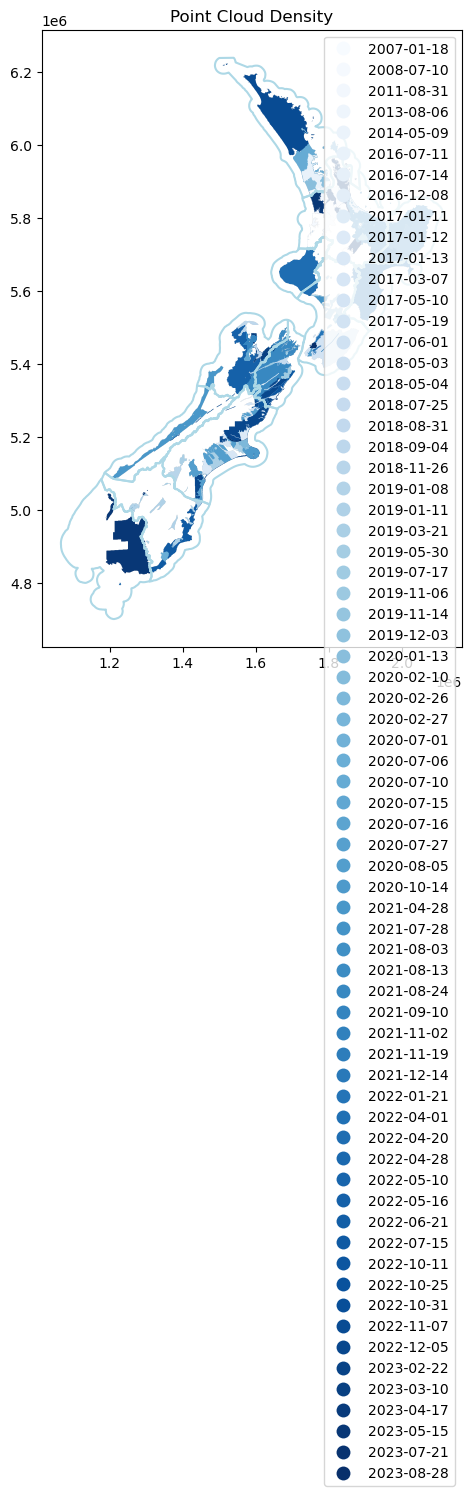

In [36]:
fig, ax = plt.subplots(figsize = (12,12))
new_gdf.plot(ax=ax, color='lightgrey')
#legend_kwds = {"shrink":.5}
new_gdf.plot(ax=ax, column="publication_date", cmap="Blues", legend=True)#, legend_kwds=legend_kwds)
distric_gdf.boundary.plot(ax=ax, color="lightblue", edgecolor='gray')
ax.set_title('Point Cloud Density')
plt.tight_layout()